# Dungeons And Dragons and Stats

Dungeons and Dragons is a Tabletop Roleplaying game (RPG) produced by Wizards of the coast.

Data from https://github.com/oganm/dnddata

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
sns.set(style="darkgrid")


Lets load in the dataset. Note that this is a tab seperated table. We'll use `\t` as the seperator to get it to load in right.

In [3]:
#dnd_df = pd.read_csv("https://raw.githubusercontent.com/ErikSeguinte/dndstats/master/docs/charTable.tsv", sep = '\t')
#dnd_df = pd.read_csv('https://raw.githubusercontent.com/oganm/dnddata/master/data-raw/dnd_chars_unique.tsv', sep = '\t')
dnd_df = pd.read_csv('dnddata/data-raw/dnd_chars_unique.tsv', sep = '\t')


In [4]:
dnd_df.columns.to_list()

['ip',
 'finger',
 'hash',
 'name',
 'race',
 'background',
 'date',
 'class',
 'justClass',
 'subclass',
 'level',
 'feats',
 'HP',
 'AC',
 'Str',
 'Dex',
 'Con',
 'Int',
 'Wis',
 'Cha',
 'alignment',
 'skills',
 'weapons',
 'spells',
 'castingStat',
 'choices',
 'country',
 'countryCode',
 'processedAlignment',
 'good',
 'lawful',
 'processedRace',
 'processedSpells',
 'processedWeapons',
 'levelGroup',
 'alias']

In [4]:
print(dnd_df.shape)
dnd_df.head()

(4786, 36)


,ip,finger,hash,name,race,background,date,class,justClass,subclass,...,country,countryCode,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,levelGroup,alias
0,fe6a0db,dfa9438,9db89a1c2df98d839bb95fbb4337ffa1,5598141,Fire Genasi,Hermit,2019-12-31T20:40:46Z,Druid 20,Druid,Circle of the Moon,...,United States,US,NaN,NaN,NaN,Genasi,NaN,Quarterstaff|Scimitar,19-20,heuristic_hamilton
1,fe6a0db,dfa9438,c4859de3f51355111d33c17c231b1f1f,5b7f0c0,Kenku,Acolyte,2019-12-31T18:01:13Z,Cleric 20,Cleric,Life Domain,...,United States,US,NaN,NaN,NaN,Kenku,Bless*1|Cure Wounds*1|Lesser Restoration*2|Spi...,"Mace|Crossbow, Light",19-20,pedantic_vaughan
2,fbbc565,acf7615,0ca83c2f792caad71a28e27264c82a3e,ad4efc7,Triton,Haunted One,2019-12-18T22:30:54Z,Warlock 20,Warlock,The Great Old One,...,United States,US,NaN,NaN,NaN,Triton,NaN,Trident,19-20,optimistic_hawking
3,771e3c1,acf7615,a425e37f4210bee779f131cb07ef05a3,14b10ec,Triton,Mercenary Veteran,2019-12-15T17:39:15Z,Monk 20,Monk,Way of the Kensei,...,United States,US,NaN,NaN,NaN,Triton,NaN,Unarmed Strike|Longbow|Trident,19-20,jovial_bassi
4,1c797fe,dbb4eaa,401ef00cd4e04844a75d4ca084e7b309,8090ffe,Goliath,Noble,2019-12-08T12:31:07Z,Paladin 20,Paladin,Oath of Conquest,...,United States,US,NaN,NaN,NaN,Goliath,*|Command*1|Hold Person*2|Spiritual Weapon*2|B...,Warhammer|Javelin,19-20,fervent_rubin


In [5]:
dnd_df = dnd_df.drop(['ip', 'finger', 'hash', 'name', 'countryCode', 'country', 'justClass', 'alias', 'levelGroup', 'processedRace'], axis=1)

The maintainer of this Dataset already did some processing and cleanup. (See the `Processed*` columns, but we're going to ignore those. This is supposed to be a learning experience, right?

Lets start with classes. What do these values look like?

In [6]:
pd.set_option('display.max_rows', 50)
pd.set_option('min_rows', 20)
pd.options.display.max_rows = 50
dnd_df['class'].value_counts()


Rogue 1                               157
Fighter 1                             133
Cleric 1                              129
Fighter 3                              97
Bard 1                                 97
Paladin 1                              96
Wizard 1                               94
Barbarian 1                            91
Ranger 1                               89
Sorcerer 1                             82
                                     ... 
Fighter 19                              1
Ranger 2|Warlock 3                      1
Cleric 6|Monk 6                         1
Rogue 3|Sorcerer 5                      1
Ranger 3|Warlock 3                      1
Sorcerer 5|Warlock 2                    1
Rogue 3|Cleric 3                        1
Fighter 11|Wizard 1                     1
Rogue 4|Bard 4|Fighter 6|Warlock 6      1
Rogue 3|Sorcerer 4                      1
Name: class, Length: 732, dtype: int64

Looks like there are a few issues. The first is that Class and level have been combined. So a 1st level wizard is in listed as `Wizard 1`. We'll want to split those up into class and level.

The next thing is multiclassing. Someone can be `wizard 1` and `barbarian 2`. In the data, they are seperated by the `|` character. We'll start by cleaning this up.

First, we'll use the `str.split()` function of the `pd.DataFrame` class to turn this string into a list of strings. Note that rows with only a single class are still turned into a list with 1 element. While we're at it, let's clean it of stray spaces or newlines, and drop anyone with more than 2 classes.



In [7]:
dnd_df['class'] = dnd_df['class'].str.split('|')
dnd_df['class']

0                     [Druid 20]
1                    [Cleric 20]
2                   [Warlock 20]
3                      [Monk 20]
4                   [Paladin 20]
5                 [Barbarian 20]
6                   [Warlock 20]
7                   [Warlock 20]
8                   [Paladin 20]
9                   [Paladin 20]
                  ...           
4776       [Fighter 1, Wizard 1]
4777        [Fighter 1, Rogue 1]
4778    [Fighter 1, Barbarian 1]
4779         [Monk 1, Fighter 1]
4780    [Barbarian 1, Fighter 1]
4781        [Rogue 1, Warlock 1]
4782        [Bard 1, Sorcerer 1]
4783         [Rogue 1, Ranger 1]
4784        [Fighter 1, Rogue 1]
4785    [Fighter 1, Barbarian 1]
Name: class, Length: 4786, dtype: object

In [8]:
# Drop anyone with more than 2 classes
valid_multiclass = dnd_df['class'].str.len() <= 2
dnd_df = dnd_df[valid_multiclass]


In [9]:
# Split Class list into 2 columns, class 1 and 2
dnd_df[['class1', 'class2']] = pd.DataFrame(dnd_df['class'].values.tolist(), index = dnd_df.index)


In [10]:
dnd_df[['just_class1', 'just_level1']] = pd.DataFrame(dnd_df['class1'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)
dnd_df[['just_class2', 'just_level2']] = pd.DataFrame(dnd_df['class2'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)

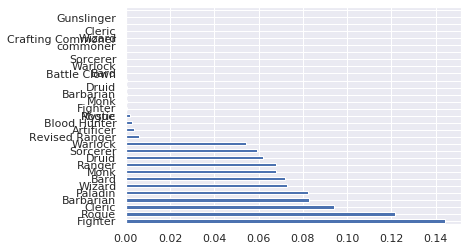

In [11]:
dnd_df['just_class1'].value_counts(normalize=True).plot(kind='barh');

There's a lot in there! Let's filter our df to only include the top 12 or so classes.

In [12]:
def graph_counts(df, label):
  ax = sns.countplot(x = label, data=df,)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

def graph_series(s):
  ax = sns.countplot(x = s.index, data=s)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

def clean_string(s:str):
    if isinstance(s, str):
        split = s.split(' ')
        return split[-1].strip().title()

In [13]:
second_class_df = dnd_df[dnd_df['just_class2'].notnull()].copy()

In [14]:
second_class_df[['just_class1', 'just_level1']] = second_class_df[['just_class2', 'just_level2']].copy()

* Adding second class to the bottom of first class. This way, a warlock/fighter would count as both a fighter and a warlock in the data.

In [17]:
dnd_df = pd.concat([dnd_df, second_class_df]).copy()

In [20]:
dnd_df = dnd_df.drop(['date','class', 'processedWeapons','processedSpells', 'just_class2', 'just_level2'],axis = 1)


In [21]:
dnd_df['just_class1'] = dnd_df['just_class1'].apply(clean_string)
dnd_df['just_class1'].value_counts()

Fighter       756
Rogue         653
Cleric        481
Barbarian     421
Paladin       401
Wizard        381
Ranger        368
Bard          365
Warlock       351
Monk          340
Sorcerer      320
Druid         319
Artificer      19
Hunter         14
Mystic         11
Commoner        2
Gunslinger      1
Clown           1
                1
Name: just_class1, dtype: int64

In [23]:
unusual_classes = dnd_df['just_class1'].value_counts()[12:].index.to_list()
unusual_classes

['Artificer', 'Hunter', 'Mystic', 'Commoner', 'Gunslinger', 'Clown', '']

In [24]:
dnd_df = dnd_df[~(single_class_df['just_class1'].isin(unusual_classes))]

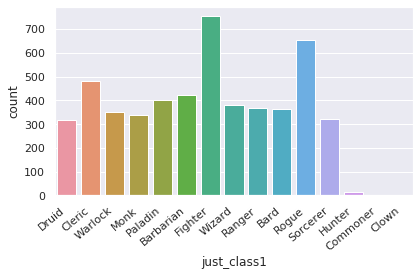

In [25]:
graph_counts(dnd_df, 'just_class1')

In [27]:
race_and_class = pd.crosstab(dnd_df['just_class1'], dnd_df['race']).T

In [28]:
race_and_class

just_class1,Barbarian,Bard,Cleric,Clown,Commoner,Druid,Fighter,Hunter,Monk,Paladin,Ranger,Rogue,Sorcerer,Warlock,Wizard
race,,,,,,,,,,,,,,,
1/2 Elf--Var.,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Aarakocra,4,2,6,0,0,2,0,0,8,2,12,2,1,4,2
Aasimar,2,0,1,0,0,0,0,0,1,2,0,2,3,1,0
Air Genasi,0,0,3,0,0,2,1,0,3,0,6,3,1,2,2
Animal Hybrid,2,0,1,0,0,0,1,0,3,2,0,1,0,1,1
Animal Hybrid (Bear),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beast,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Beasthide,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
Birdfolk,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0


Races are mixed in with subraces, which makes it more difficult to classify.

`Wood Elf` should really just be `Elf`, with a subrace of `Wood Elf`

For the most part, we can classify them by splitting them and taking the  last word.

And we'll drop any unusual races too

In [30]:
def clean_race(s:str):
    if isinstance(s, str):
        split = s.split(' ')
        return split[-1].strip().title()


        

In [31]:
dnd_df['race'] = dnd_df['race'].apply(clean_race)
dnd_df

,race,background,subclass,level,feats,HP,AC,Str,Dex,Con,...,spells,castingStat,choices,processedAlignment,good,lawful,class1,class2,just_class1,just_level1
0,Genasi,Hermit,Circle of the Moon,20,NaN,203,14,15,17,20,...,NaN,Wis,NaN,NaN,NaN,NaN,Druid 20,None,Druid,20
1,Kenku,Acolyte,Life Domain,20,Healer|Linguist,180,18,11,11,16,...,Bless*1|Cure Wounds*1|Lesser Restoration*2|Spi...,Wis,NaN,NaN,NaN,NaN,Cleric 20,None,Cleric,20
2,Triton,Haunted One,The Great Old One,20,Spell Sniper,206,14,20,18,20,...,NaN,Cha,eldritch invocations/Armor of Shadows*Agonizin...,NaN,NaN,NaN,Warlock 20,None,Warlock,20
3,Triton,Mercenary Veteran,Way of the Kensei,20,NaN,157,19,20,20,15,...,NaN,Wis,NaN,NaN,NaN,NaN,Monk 20,None,Monk,20
4,Goliath,Noble,Oath of Conquest,20,NaN,279,20,29,18,24,...,Armor of Frost*1|Command*1|Hold Person*2|Spiri...,Cha,fighting style/Dueling,NaN,NaN,NaN,Paladin 20,None,Paladin,20
5,Human,Sailor,Path of the Storm Herald,20,Polearm Master|Tough,301,22,24,17,24,...,NaN,Int,NaN,NaN,NaN,NaN,Barbarian 20,None,Barbarian,20
6,Half-Orc,Sailor,The Great Old One,20,War Caster|Actor|Observant,202,13,20,13,18,...,Chill Touch*0|Eldritch Blast*0|Mage Hand*0|Min...,Cha,pact boon/Pact of the Blade|eldritch invocatio...,NaN,NaN,NaN,Warlock 20,None,Warlock,20
7,Triton,Charlatan,The Great Old One,20,Spell Sniper,209,13,10,17,20,...,NaN,Cha,eldritch invocations/Agonizing Blast*Devil's S...,NaN,NaN,NaN,Warlock 20,None,Warlock,20
8,Half-Elf,Acolyte,Oath of Vengeance,20,NaN,255,24,20,14,20,...,Bane*1|Hunter’s Mark*1|Divine Favor*1|Sheild O...,Cha,fighting style/Protection,CN,NaN,NaN,Paladin 20,None,Paladin,20
9,Tiefling,Acolyte,OathBreaker,20,NaN,225,19,18,15,16,...,Hellish Rebuke*1|Inflict Wounds*1|Crown of Mad...,Cha,fighting style/Defense|tiefling variants menu/...,NaN,NaN,NaN,Paladin 20,None,Paladin,20


In [32]:
counts = dnd_df['race'].value_counts()
counts

Human         1131
Elf            605
Half-Elf       325
Dwarf          309
Dragonborn     274
Halfling       246
Tiefling       218
Half-Orc       215
Gnome          180
Aasimar        179
              ... 
(White)          1
Gray-Elf         1
(Volvo'S)        1
(Glasya)         1
Leonine          1
Penguin          1
Luxodon          1
Siren            1
Staemmige        1
Turtlebear       1
Name: race, Length: 140, dtype: int64

I think we might have a few home brew or other unusual races. Lets say keep the top 16 races

In [42]:
unusual_races = counts[16:].index.tolist()



In [43]:
dnd_df = dnd_df[~(dnd_df['race'].isin(unusual_races))]



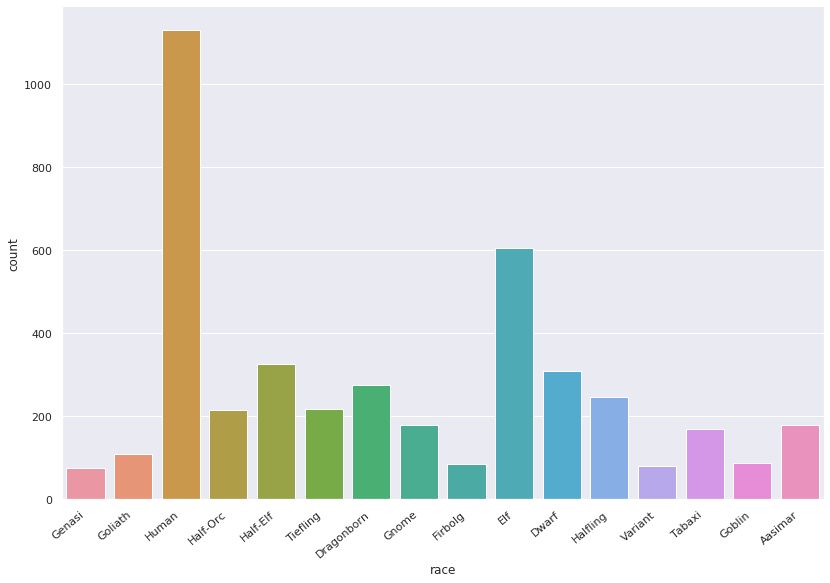

In [44]:
graph_counts(dnd_df, 'race')

In [45]:
race_and_class = pd.crosstab(dnd_df['race'], dnd_df['just_class1'])
race_and_class_margins = pd.crosstab(dnd_df['race'], dnd_df['just_class1'], margins = True)
race_and_class_normalized = pd.crosstab(dnd_df['race'], dnd_df['just_class1'], normalize='all')

In [46]:
race_and_class_margins

just_class1,Barbarian,Bard,Cleric,Clown,Commoner,Druid,Fighter,Hunter,Monk,Paladin,Ranger,Rogue,Sorcerer,Warlock,Wizard,All
race,,,,,,,,,,,,,,,,
Aasimar,4,11,24,0,0,1,8,0,7,49,6,9,27,30,3,179
Dragonborn,32,11,23,0,0,4,49,0,19,52,16,10,32,22,4,274
Dwarf,60,10,85,0,0,18,51,0,13,25,12,16,7,3,9,309
Elf,11,19,53,0,0,63,61,2,51,26,86,99,31,23,80,605
Firbolg,6,3,13,1,0,39,8,0,2,2,5,2,0,1,2,84
Genasi,3,0,7,0,0,10,9,0,9,4,8,6,6,4,10,76
Gnome,6,13,7,0,1,17,13,1,10,3,10,26,9,6,58,180
Goblin,6,8,6,0,0,5,14,0,4,4,9,19,7,2,4,88
Goliath,47,6,6,0,0,2,27,2,3,9,2,2,1,2,0,109


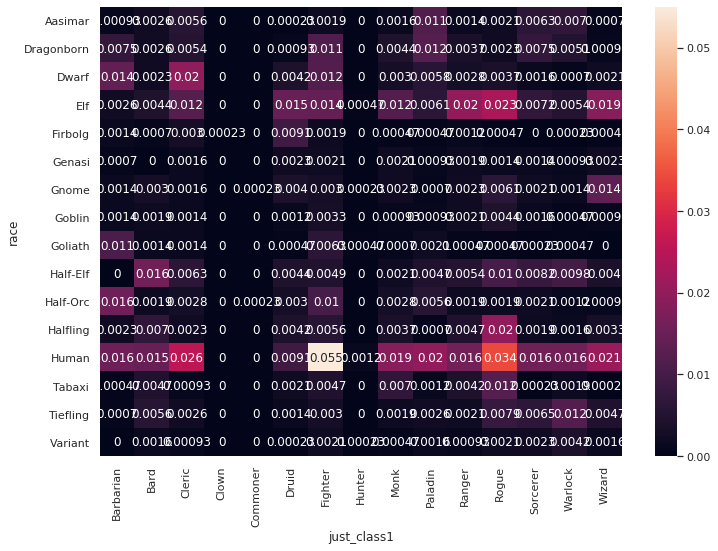

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(race_and_class_normalized, annot = True)



In [48]:
fig = go.Figure(
    data = go.Heatmap(
        z=race_and_class,
        x=race_and_class.columns,
        y=race_and_class.index)
)
fig.update_layout(
    autosize=False,
    width = 800,
    height=800
)
fig.show()

## Alignments

Lets isolate Good and Evil vs Law and Chaos

In [49]:
single_class_df['processedAlignment'].value_counts()

CN    385
CG    342
NG    267
NN    176
LN    143
LG    138
LE     38
NE     33
CE     27
Name: processedAlignment, dtype: int64

In [50]:
Good = ['LG',"NG", 'CG']
neutral_good = ['LN', 'NN', 'CN']
Evil = ['LE', 'NE', 'CE']
law = ['LG', 'LN', 'LE']
neutral_law = ['NG', 'NN', 'NE']
chaos = ['CG', 'CN', 'CE']

In [67]:
def isolate_alignment(df):
    Good = ['LG',"NG", 'CG']
    neutral_good = ['LN', 'NN', 'CN']
    Evil = ['LE', 'NE', 'CE']
    law = ['LG', 'LN', 'LE']
    neutral_law = ['NG', 'NN', 'NE']
    chaos = ['CG', 'CN', 'CE']
    df.loc[:,'good'] = [
        np.NaN if not isinstance(x, str) 
        else 'G' if x  in Good  
        else 'N' if x in neutral_good 
        else 'E' if x in Evil 
        else np.NaN 
        for x in df['processedAlignment'] 
        ]
    df.loc[:,'law'] = [
        np.NaN if not isinstance(x, str) 
        else 'L' if x  in law  
        else 'N' if x in neutral_law 
        else 'C' if x in chaos 
        else np.NaN 
        for x in df['processedAlignment'] 
        ]

    # Properly order new categories
    df['good'] = df['good'].astype(pd.CategoricalDtype(ordered=True)).cat.reorder_categories(['G', 'N', 'E'])
    df['law'] = df['law'].astype(pd.CategoricalDtype(ordered=True)).cat.reorder_categories(['L', 'N', 'C'])
    df['processedAlignment'] = df['processedAlignment'].astype(pd.CategoricalDtype(ordered=True)).cat.reorder_categories(['LG', 'NG', 'CG', 'LN', 'NN', 'CN', 'LE', 'NE', 'CE'])
    return df


In [68]:
dnd_df = isolate_alignment(dnd_df)

In [69]:

pd.crosstab(dnd_df['law'], dnd_df['good'], normalize = 'all')

good,G,N,E
law,,,
L,0.087706,0.088489,0.026625
N,0.176194,0.107283,0.019577
C,0.229444,0.247455,0.017228


In [70]:
races_and_alignments = pd.crosstab(dnd_df['race'], dnd_df['processedAlignment'])

In [71]:

stats.chi2_contingency(races_and_alignments)

(301.1507455834633,
 1.4602877977365953e-17,
 120,
 array([[ 4.82758621,  9.69827586, 12.62931034,  4.87068966,  5.90517241,
         13.62068966,  1.46551724,  1.03448276,  0.94827586],
        [ 6.75862069, 13.57758621, 17.68103448,  6.81896552,  8.26724138,
         19.06896552,  2.05172414,  1.44827586,  1.32758621],
        [ 8.42633229, 16.92789969, 22.04388715,  8.5015674 , 10.30721003,
         23.77429467,  2.55799373,  1.80564263,  1.65517241],
        [17.20376176, 34.56112853, 45.00626959, 17.35736677, 21.04388715,
         48.53918495,  5.22257053,  3.68652038,  3.37931034],
        [ 2.01880878,  4.05564263,  5.28134796,  2.03683386,  2.46943574,
          5.69592476,  0.61285266,  0.43260188,  0.39655172],
        [ 1.5799373 ,  3.17398119,  4.13322884,  1.59404389,  1.93260188,
          4.45768025,  0.47962382,  0.33855799,  0.31034483],
        [ 4.73981191,  9.52194357, 12.39968652,  4.78213166,  5.79780564,
         13.37304075,  1.43887147,  1.01567398,  0.93103448

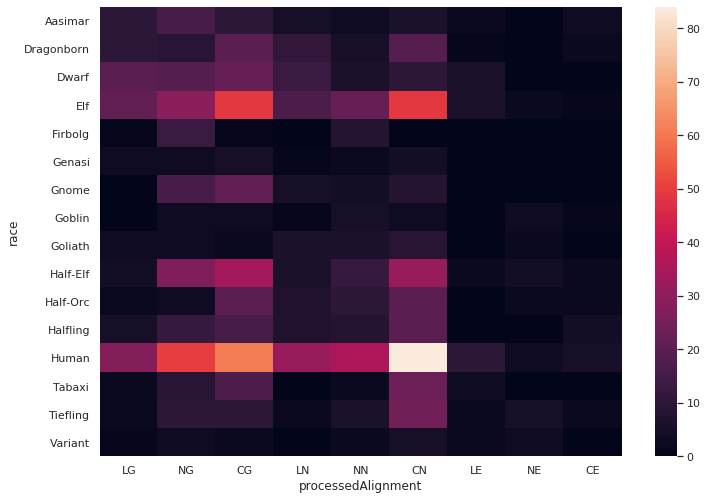

In [72]:
sns.heatmap(races_and_alignments)